In [2]:
import pandas as pd
import numpy as np
import openpyxl
import os
from ydata_profiling import ProfileReport

In [3]:
file_path = './sales_df.xlsx'
if os.path.exists(file_path):
    print('File was found')
else:
    print("File not found")

File was found


In [4]:
sales_df = pd.read_excel(file_path, header=2)
# header=2, чтобы 1 строка не была заголовками столбцов
# print(sales_df.head())

sales_size = sales_df.shape
print(f'Number of rows and columns: {sales_size}')
len_sales = len(sales_df)
print(f'Number of rows: {len_sales}')
column_sales = len(sales_df.columns)
print(f'Number of columns: {column_sales}')

Number of rows and columns: (49900, 21)
Number of rows: 49900
Number of columns: 21


In [5]:
# Приводми все колонки к 1 naming convention
head = sales_df.columns
print('Initial column names:', head)
sales_df.columns = head.str.lower().str.replace(' ', '_')
print('Resulting column names:', sales_df.columns)

Initial column names: Index(['Traransaction Id', 'transaction_date', 'Transaction Time',
       'customer_id', 'instore_yn', 'line_item_id', 'Product Id', 'quantity',
       'line_item_amount', 'unit_price', 'promo_item_yn', 'ProductGroup',
       'product_category', 'product_type', 'product', 'unit_of_measure',
       'sales_outlet_type', 'store_address', 'store_city',
       'store_state_province', 'manager'],
      dtype='object')
Resulting column names: Index(['traransaction_id', 'transaction_date', 'transaction_time',
       'customer_id', 'instore_yn', 'line_item_id', 'product_id', 'quantity',
       'line_item_amount', 'unit_price', 'promo_item_yn', 'productgroup',
       'product_category', 'product_type', 'product', 'unit_of_measure',
       'sales_outlet_type', 'store_address', 'store_city',
       'store_state_province', 'manager'],
      dtype='object')


In [6]:
sales_df = sales_df[~sales_df.isna().any(axis=1)] # берем все не нулевые строки и сохраняем их, как новый DataFrame
sales_size = sales_df.shape
print(sales_size)

sales_df[sales_df.duplicated()].sort_values('traransaction_id')

(49894, 21)


traransaction_id transaction_date transaction_time  customer_id  \
3956                7.0       2019-04-08         09:32:15        410.0   
40662               9.0       2019-04-14         08:47:06          0.0   
20406              23.0       2019-04-08         09:38:08       5362.0   
21010              32.0       2019-04-09         09:56:57       5095.0   
20448              50.0       2019-04-08         07:30:17       5438.0   
11793             203.0       2019-04-21         08:29:44         18.0   
40224             203.0       2019-04-13         08:50:03          0.0   
20150             204.0       2019-04-07         08:06:36       5531.0   
40974             205.0       2019-04-14         10:11:55          0.0   
20154             206.0       2019-04-07         10:10:26       5563.0   
20153             206.0       2019-04-07         10:10:26       5563.0   
20157             207.0       2019-04-07         10:29:12       5083.0   
11799             208.0       2019-04-21         10:55:47        202.0   
40231             208.0       2019-04-13         08:03:26       8327.0   
26278             209.0       2019-04-18         07:58:20          0.0   
39564             210.0       2019-04-12         08:03:48       8049.0   
20722             248.0       2019-04-08         09:27:09       5181.0   
20857             356.0       2019-04-08         11:49:26          0.0   
21512             427.0       2019-04-09         12:11:08       5054.0   

      instore_yn  line_item_id  product_id  quantity line_item_amount  \
3956           Y           1.0        44.0       1.0              2.5   
40662          N           5.0        78.0       1.0              4.5   
20406          Y           1.0        41.0       1.0             4.25   
21010          Y           1.0        40.0       1.0             3.75   
20448          Y           1.0        39.0       1.0             4.25   
11793          N           1.0        71.0       1.0                1   
40224          N           1.0        71.0       1.0             3.75   
20150          N           1.0        71.0       1.0                1   
40974          N           1.0        71.0       1.0             3.75   
20154          Y           1.0        71.0       1.0                1   
20153          Y           1.0        71.0       1.0                1   
20157          Y           1.0        71.0       1.0                1   
11799          N           1.0        71.0       1.0                1   
40231          N           1.0        71.0       1.0             3.75   
26278          N           1.0        71.0       1.0                1   
39564          Y           1.0        71.0       1.0             3.75   
20722          Y           1.0        37.0       1.0                3   
20857          Y           1.0        37.0       1.0                3   
21512          N           1.0        41.0       1.0             4.25   

       unit_price  ... productgroup product_category       product_type  \
3956         2.50  ...    Beverages              Tea  Brewed herbal tea   
40662        4.50  ...         Food           Bakery              Scone   
20406        4.25  ...    Beverages           Coffee   Barista Espresso   
21010        3.75  ...    Beverages           Coffee   Barista Espresso   
20448        4.25  ...    Beverages           Coffee   Barista Espresso   
11793        3.75  ...         Food           Bakery             Pastry   
40224        3.75  ...         Food           Bakery             Pastry   
20150        3.75  ...         Food           Bakery             Pastry   
40974        3.75  ...         Food           Bakery             Pastry   
20154        3.75  ...         Food           Bakery             Pastry   
20153        3.75  ...         Food           Bakery             Pastry   
20157        3.75  ...         Food           Bakery             Pastry   
11799        3.75  ...         Food           Bakery             Pastry   
40231        3.

In [7]:
sales_df.drop_duplicates(inplace=True)
print('новая размерность выборки после удаления дубликатов', sales_df.shape)

новая размерность выборки после удаления дубликатов (49875, 21)


In [8]:
# проверяем что дубликаты удалились
sales_df[sales_df.duplicated()].sort_values('traransaction_id')

Empty DataFrame
Columns: [traransaction_id, transaction_date, transaction_time, customer_id, instore_yn, line_item_id, product_id, quantity, line_item_amount, unit_price, promo_item_yn, productgroup, product_category, product_type, product, unit_of_measure, sales_outlet_type, store_address, store_city, store_state_province, manager]
Index: []

[0 rows x 21 columns]

In [9]:
#проверяем дубликаты по 'transaction_id'
len(sales_df[sales_df['traransaction_id'].duplicated()]) #45672 должно быть

45672

In [10]:
sales_df.nunique() # считаем количество повторяющихся значений

traransaction_id         4203
transaction_date           29
transaction_time        26074
customer_id              2248
instore_yn                  5
line_item_id               11
product_id                 80
quantity                    6
line_item_amount           78
unit_price                 41
promo_item_yn               2
productgroup                6
product_category           10
product_type               29
product                    80
unit_of_measure            12
sales_outlet_type           2
store_address               3
store_city                  2
store_state_province        1
manager                     3
dtype: int64

In [11]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49875 entries, 0 to 49899
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   traransaction_id      49875 non-null  float64
 1   transaction_date      49875 non-null  object 
 2   transaction_time      49875 non-null  object 
 3   customer_id           49875 non-null  float64
 4   instore_yn            49875 non-null  object 
 5   line_item_id          49875 non-null  float64
 6   product_id            49875 non-null  float64
 7   quantity              49875 non-null  float64
 8   line_item_amount      49875 non-null  object 
 9   unit_price            49875 non-null  float64
 10  promo_item_yn         49875 non-null  object 
 11  productgroup          49875 non-null  object 
 12  product_category      49875 non-null  object 
 13  product_type          49875 non-null  object 
 14  product               49875 non-null  object 
 15  unit_of_measure       49

In [12]:
columns_to_convert = ['traransaction_id', 'customer_id', 'line_item_id', 'product_id']
sales_df[columns_to_convert].astype(int)

traransaction_id  customer_id  line_item_id  product_id
0                     7          558             1          52
1                    11          781             1          27
2                    19          788             1          46
3                    32          683             1          23
4                    33           99             1          34
...                 ...          ...           ...         ...
49895               753            0             1          30
49896               756         8412             1          25
49897               759            0             1          31
49898               763         8030             1          44
49899               763         8030             5          75

[49875 rows x 4 columns]

In [13]:
sales_df.transaction_date.apply(pd.to_datetime)

0       2019-04-01
1       2019-04-01
2       2019-04-01
3       2019-04-01
4       2019-04-01
           ...    
49895   2019-04-29
49896   2019-04-29
49897   2019-04-29
49898   2019-04-29
49899   2019-04-29
Name: transaction_date, Length: 49875, dtype: datetime64[ns]

In [14]:
sales_df.head()

traransaction_id transaction_date transaction_time  customer_id instore_yn  \
0               7.0       2019-04-01         12:04:43        558.0          N   
1              11.0       2019-04-01         15:54:39        781.0          N   
2              19.0       2019-04-01         14:34:59        788.0          Y   
3              32.0       2019-04-01         16:06:04        683.0          N   
4              33.0       2019-04-01         19:18:37         99.0          Y   

   line_item_id  product_id  quantity line_item_amount  unit_price  ...  \
0           1.0        52.0       1.0              2.5        2.50  ...   
1           1.0        27.0       2.0                7        3.50  ...   
2           1.0        46.0       2.0                5        2.50  ...   
3           1.0        23.0       2.0                5        2.50  ...   
4           1.0        34.0       1.0             2.45        2.45  ...   

  productgroup product_category           product_type  \
0    Beverages              Tea        Brewed Chai tea   
1    Beverages           Coffee  Organic brewed coffee   
2    Beverages              Tea       Brewed Green tea   
3    Beverages           Coffee            Drip coffee   
4    Beverages           Coffee  Premium brewed coffee   

                       product unit_of_measure sales_outlet_type  \
0    Traditional Blend Chai Rg           16 oz            retail   
1                 Brazilian Lg           24 oz            retail   
2        Serenity Green Tea Rg           16 oz            retail   
3  Our Old Time Diner Blend Rg           16 oz            retail   
4     Jamaican Coffee River Sm            8 oz            retail   

    store_address        store_city store_state_province manager  
0  32-20 Broadway  Long Island City                   NY     6.0  
1  32-20 Broadway  Long Island City                   NY     6.0  
2  32-20 Broadway  Long Island City                   NY     6.0  
3  32-20 Broadway  Long Island City                   NY     6.0  
4  32-20 Broadway  Long Island City                   NY     6.0  

[5 rows x 21 columns]

заменить данные y\n на yes\no

In [15]:

sales_df['instore_yn'].replace({'Y': 'Yes', 'N': 'No'})

0         No
1         No
2        Yes
3         No
4        Yes
        ... 
49895     No
49896    Yes
49897    Yes
49898     No
49899     No
Name: instore_yn, Length: 49875, dtype: object

In [16]:
sales_df['sales_outlet_type'].str.lower()

0        retail
1        retail
2        retail
3        retail
4        retail
          ...  
49895    retail
49896    retail
49897    retail
49898    retail
49899    retail
Name: sales_outlet_type, Length: 49875, dtype: object

In [17]:
# список product id, которые нужно оставить
product_id_trans = [23, 25, 27, 32, 34, 35, 49]

# фильтрация данных по product id
filteres_sales_df = sales_df[sales_df['product_id'].isin(product_id_trans)]

print("Количество строк после фильтрации:", len(filteres_sales_df))

Количество строк после фильтрации: 6546


Оставить только часть столбцов в датафрейме

In [18]:
columns_to_keep = ['traransaction_id', 'transaction_date', 'transaction_time', 'customer_id', 
                   'product_id', 'quantity', 'unit_price', 'store_address', 'manager']

# фильтрация данных по указанным столбцам
filteres_sales_df = sales_df.loc[:, columns_to_keep]

# вывод первых нескольких строк нового DataFrame
print(filteres_sales_df.head())

print('Размер нового DataFrame:', filteres_sales_df.shape)

   traransaction_id transaction_date transaction_time  customer_id  \
0               7.0       2019-04-01         12:04:43        558.0   
1              11.0       2019-04-01         15:54:39        781.0   
2              19.0       2019-04-01         14:34:59        788.0   
3              32.0       2019-04-01         16:06:04        683.0   
4              33.0       2019-04-01         19:18:37         99.0   

   product_id  quantity  unit_price   store_address  manager  
0        52.0       1.0        2.50  32-20 Broadway      6.0  
1        27.0       2.0        3.50  32-20 Broadway      6.0  
2        46.0       2.0        2.50  32-20 Broadway      6.0  
3        23.0       2.0        2.50  32-20 Broadway      6.0  
4        34.0       1.0        2.45  32-20 Broadway      6.0  
Размер нового DataFrame: (49875, 9)


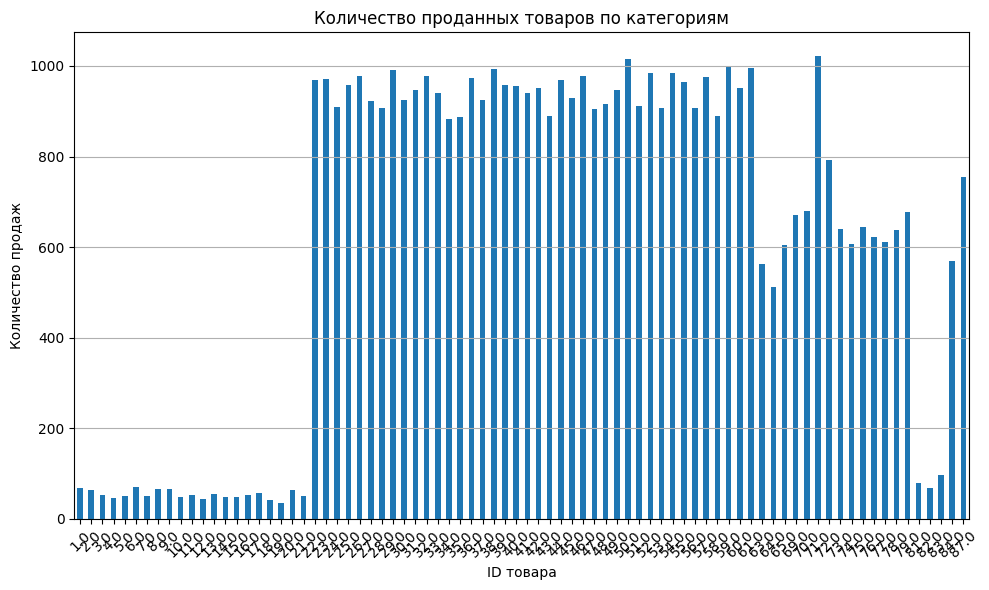

In [19]:
# команда для автоматического отображения графиков
%matplotlib inline

import matplotlib.pyplot as plt

# группировка данных по категориям (product_id) и подсчет количества продаж
product_sales = sales_df.groupby('product_id').size()

# визуализация результата
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar')
plt.title('Количество проданных товаров по категориям')
plt.xlabel('ID товара')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Рассчитать сумму продаж на каждый день

/tmp/ipykernel_7881/3143069793.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_sales = sales_df.groupby('transaction_date').apply(


0        2019-04-01
1        2019-04-01
2        2019-04-01
3        2019-04-01
4        2019-04-01
            ...    
49895    2019-04-29
49896    2019-04-29
49897    2019-04-29
49898    2019-04-29
49899    2019-04-29
Name: transaction_date, Length: 49875, dtype: object


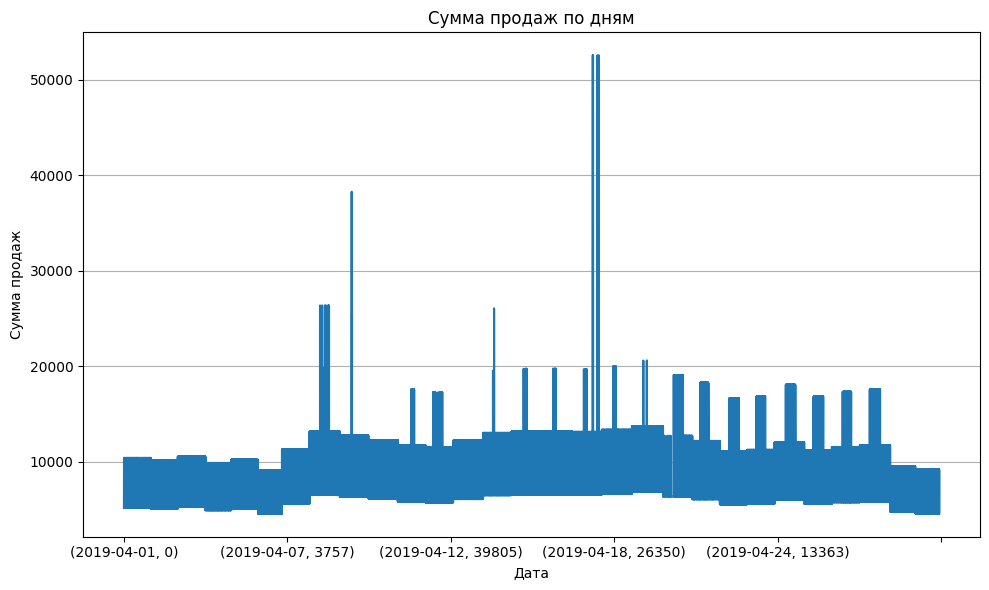

In [ ]:
# рассчет суммы продаж на каждый день
daily_sales = sales_df.groupby('transaction_date')[['quantity', 'unit_price']].apply(
    lambda x: x['quantity'] * x['unit_price'].sum()
)

# визуализация результата
plt.figure(figsize=(10, 6))
daily_sales.plot()
plt.title('Сумма продаж по дням')
plt.xlabel('Дата')
plt.ylabel('Сумма продаж')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [22]:
profile = ProfileReport(sales_df, title='Profiling Report')
profile.to_file('./new_report.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
# путь и имя файла, в который нужно сохранить DataFrame
output_file_path = 'transformed_data_sales.xlsx'

# запишите DataFrame в Excel файл
daily_sales.to_excel(output_file_path)

In [24]:
sales_df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]